In [39]:
import streamlit as st
import pandas as pd
import os
import sys
from pathlib import Path
from datetime import datetime
from dateutil.relativedelta import relativedelta
import yfinance as yf
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# sys.path.insert(0, os.path.join(Path(__file__).parents[1]))
# from to_postgres import PgHook
from to_postgres import PgHook

# make database helper object
db = PgHook()

In [40]:
today = datetime.today().strftime("%Y-%m-%d")
five = (datetime.today() - relativedelta(years=5)).strftime("%Y-%m-%d")
sql = "select ticker from portfolio"
df = db.alc_query(sql)
port_list = df["ticker"].tolist()

In [42]:
port_list

['CIVI',
 'CPG',
 'CRK',
 'MGY',
 'MRO',
 'PR',
 'RRC',
 'SM',
 'VET',
 'GPOR',
 'CHRD',
 'OVV',
 'PBF',
 'VLO',
 'DINO',
 'PARR',
 'PSX',
 'CVI',
 'MPC',
 'TS',
 'LBRT',
 'BP',
 'E',
 'SHEL',
 'TTE',
 'ARLP',
 'BTU',
 'CEIX',
 'ARCH',
 'CL=F',
 'BZ=F']

In [43]:
# create class to convert string to object location name
class ClassThing:
    def __init__(self, name):
        self.name = name

# dictionary to hold ticker and pd.series object location name
dct = {name: ClassThing(name) for name in port_list}

In [44]:
# get price data for tickers in list using yfinance where pd.series are memory location names
for stk in port_list:
    print(f"Downloading data for {stk}")
    dct[stk] = yf.download(stk, start=five, end=today)["Adj Close"]
# combine the tickers into a single dataframe
port = pd.concat([dct[x] for x in port_list], axis=1)
# ticker names to portfolio
port.columns = port_list

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [45]:
port

,CIVI,CPG,CRK,MGY,MRO,PR,RRC,SM,VET,GPOR,...,BP,E,SHEL,TTE,ARLP,BTU,CEIX,ARCH,CL=F,BZ=F
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-23,22.743902,4.292387,7.458374,12.977584,18.230770,19.068676,15.986717,25.972816,23.433123,NaN,...,32.041763,25.226337,50.552940,42.640392,12.719261,32.265011,36.820148,72.764610,66.430000,76.440002
2018-10-24,21.389807,4.003216,6.815245,12.381577,17.173237,17.969309,15.258726,24.611876,22.695517,NaN,...,31.049448,24.310217,49.143127,41.221943,12.621069,30.833431,34.386604,68.506302,66.820000,76.169998
2018-10-25,22.476324,4.662889,6.892036,12.631516,17.585022,18.144428,15.501390,24.928764,22.030863,NaN,...,31.503946,24.771942,49.615734,42.097626,12.922194,31.830103,36.195446,68.498672,67.330002,76.889999
2018-10-26,22.200644,4.644814,6.776850,12.612289,17.491436,18.173615,15.375205,24.314192,22.022758,NaN,...,31.132772,25.284973,49.591702,41.858810,12.804361,31.712320,36.708263,70.563103,67.589996,77.620003
2018-10-29,21.697924,4.446010,6.517678,12.054734,16.986067,17.599609,14.831635,22.835367,21.414843,NaN,...,31.079750,25.380253,49.063030,41.460766,12.693078,30.715643,36.437870,70.928741,67.040001,77.339996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-16,75.559998,8.190000,12.580000,23.629999,28.450001,15.030000,35.060001,42.150002,15.100000,122.680000,...,40.220001,32.750000,68.110001,66.550003,23.520000,25.719999,109.419998,154.869995,86.660004,89.650002
2023-10-17,76.699997,8.320000,13.010000,23.540001,28.629999,15.160000,35.430000,42.070000,15.290000,126.019997,...,40.810001,33.049999,68.480003,67.000000,23.940001,25.770000,111.080002,158.550003,86.660004,89.900002
2023-10-18,78.199997,8.340000,12.940000,23.510000,28.850000,15.240000,35.090000,42.180000,15.160000,127.510002,...,40.720001,32.799999,68.489998,67.040001,23.969999,25.540001,109.010002,156.699997,88.320000,91.500000


In [46]:
tablename = "prices"
port.columns = port.columns.str.lower()
# port.index.name = port.index.name.lower()
port = port.rename_axis('price_date')
port.head()
# db.alc_df_2_db(port, tablename)

,civi,cpg,crk,mgy,mro,pr,rrc,sm,vet,gpor,...,bp,e,shel,tte,arlp,btu,ceix,arch,cl=f,bz=f
price_date,,,,,,,,,,,,,,,,,,,,,
2018-10-23,22.743902,4.292387,7.458374,12.977584,18.230770,19.068676,15.986717,25.972816,23.433123,NaN,...,32.041763,25.226337,50.552940,42.640392,12.719261,32.265011,36.820148,72.764610,66.430000,76.440002
2018-10-24,21.389807,4.003216,6.815245,12.381577,17.173237,17.969309,15.258726,24.611876,22.695517,NaN,...,31.049448,24.310217,49.143127,41.221943,12.621069,30.833431,34.386604,68.506302,66.820000,76.169998
2018-10-25,22.476324,4.662889,6.892036,12.631516,17.585022,18.144428,15.501390,24.928764,22.030863,NaN,...,31.503946,24.771942,49.615734,42.097626,12.922194,31.830103,36.195446,68.498672,67.330002,76.889999
2018-10-26,22.200644,4.644814,6.776850,12.612289,17.491436,18.173615,15.375205,24.314192,22.022758,NaN,...,31.132772,25.284973,49.591702,41.858810,12.804361,31.712320,36.708263,70.563103,67.589996,77.620003
2018-10-29,21.697924,4.446010,6.517678,12.054734,16.986067,17.599609,14.831635,22.835367,21.414843,NaN,...,31.079750,25.380253,49.063030,41.460766,12.693078,30.715643,36.437870,70.928741,67.040001,77.339996


In [33]:
port.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-10-22 to 2023-10-20
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   civi    1258 non-null   float64
 1   cpg     1258 non-null   float64
 2   crk     1258 non-null   float64
 3   mgy     1258 non-null   float64
 4   mro     1258 non-null   float64
 5   pr      1258 non-null   float64
 6   rrc     1258 non-null   float64
 7   sm      1258 non-null   float64
 8   vet     1258 non-null   float64
 9   gpor    1258 non-null   float64
 10  chrd    1258 non-null   float64
 11  ovv     1258 non-null   float64
 12  pbf     1258 non-null   float64
 13  vlo     1258 non-null   float64
 14  dino    1258 non-null   float64
 15  parr    1258 non-null   float64
 16  psx     1258 non-null   float64
 17  cvi     1258 non-null   float64
 18  mpc     1258 non-null   float64
 19  ts      1258 non-null   float64
 20  lbrt    1258 non-null   float64
 21  bp      1258 non-nu

In [51]:
port.fillna(0, inplace=True)

In [52]:
port.iloc[:, 1:] = port.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

In [53]:
log_rets = np.log(port/port.shift(1))

/home/rthomas/anaconda3/envs/obb/lib/python3.9/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/rthomas/anaconda3/envs/obb/lib/python3.9/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [54]:
log_rets.head()

,civi,cpg,crk,mgy,mro,pr,rrc,sm,vet,gpor,...,bp,e,shel,tte,arlp,btu,ceix,arch,cl=f,bz=f
date,,,,,,,,,,,,,,,,,,,,,
2018-10-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-23,-0.026387,-0.075010,-0.075578,-0.012514,-0.049083,-0.046358,-0.013868,-0.061189,-0.009981,NaN,...,-0.019663,-0.015567,-0.027968,-0.014825,-0.014815,-0.002524,-0.003791,0.007039,-0.040418,-0.043393
2018-10-24,-0.061382,-0.069745,-0.090175,-0.047014,-0.059759,-0.059382,-0.046607,-0.053821,-0.031983,NaN,...,-0.031459,-0.036992,-0.028284,-0.033831,-0.007750,-0.045384,-0.068378,-0.060304,0.005854,-0.003538
2018-10-25,0.049548,0.152537,0.011205,0.019985,0.023695,0.009698,0.015778,0.012793,-0.029723,NaN,...,0.014531,0.018815,0.009571,0.021020,0.023579,0.031813,0.051266,-0.000111,0.007603,0.009408
2018-10-26,-0.012341,-0.003883,-0.016854,-0.001523,-0.005336,0.001607,-0.008174,-0.024962,-0.000368,NaN,...,-0.011852,0.020498,-0.000484,-0.005689,-0.009160,-0.003708,0.014068,0.029692,0.003854,0.009449


In [55]:
log_rets = log_rets.drop(log_rets.index[0])

In [56]:
log_rets = log_rets.fillna(0)

In [57]:
tablename = "log_returns"
db.alc_df_2_db(log_rets, tablename)

In [34]:
answer = 'Exploration and Production'
sql = f"select p.ticker from portfolio p, sector s where s.sector_id = p.sector_id and s.sector_name = '{answer}'"
ticker_df = db.alc_query(sql)
ticker_df


,ticker
0,CIVI
1,CPG
2,CRK
3,MGY
4,MRO
5,PR
6,RRC
7,SM
8,VET
9,GPOR


In [35]:
# make tickers a list
ticker_lst = [ticker.lower() for ticker in ticker_df["ticker"]]
# put them in a comma separated string
columns = ", ".join(ticker_lst)
# use this to select just these tickers from table
sql2 = f'select date, {columns} from log_returns'
sql2

'select date, civi, cpg, crk, mgy, mro, pr, rrc, sm, vet, gpor, chrd, ovv from log_returns'

In [25]:
df = db.psy_query(sql2)
df.head()

,date,civi,cpg,crk,mgy,mro,pr,rrc,sm,vet,gpor,chrd,ovv
0,2018-10-23,-0.026387,-0.075010,-0.075578,-0.012514,-0.049083,-0.046358,-0.013868,-0.061189,-0.009981,0.0,-0.053882,-0.053870
1,2018-10-24,-0.061382,-0.069745,-0.090175,-0.047014,-0.059759,-0.059382,-0.046607,-0.053821,-0.031983,0.0,-0.091014,-0.044110
2,2018-10-25,0.049548,0.152537,0.011205,0.019985,0.023695,0.009698,0.015778,0.012793,-0.029723,0.0,0.004801,0.032790
3,2018-10-26,-0.012341,-0.003883,-0.016854,-0.001523,-0.005336,0.001607,-0.008174,-0.024962,-0.000368,0.0,-0.023257,-0.027900
4,2018-10-29,-0.022905,-0.043745,-0.038994,-0.045214,-0.029318,-0.032094,-0.035994,-0.062750,-0.027992,0.0,-0.051293,-0.033733


In [68]:
cumul_return2 = df.drop(columns=['date']).apply(lambda x: (1 + x).cumprod() - 1) * 100
cumul_return2.insert(0, 'date', df['date'])
cumul_return2.head()

,date,civi,cpg,crk,mgy,mro,pr,rrc,sm,vet,gpor,chrd,ovv
0,2018-10-23,-2.638676,-7.500963,-7.557780,-1.251405,-4.908349,-4.635765,-1.386849,-6.118865,-0.998111,0.0,-5.388198,-5.386984
1,2018-10-24,-8.614940,-13.952310,-15.893788,-5.893959,-10.590898,-10.298670,-5.982879,-11.171672,-4.164525,0.0,-13.999177,-9.560400
2,2018-10-25,-4.086993,-0.826850,-14.951414,-4.013213,-8.472309,-9.428711,-4.499465,-10.035261,-7.013033,0.0,-13.586313,-6.594899
3,2018-10-26,-5.270701,-1.211955,-16.384850,-4.159431,-8.960742,-9.283130,-5.280052,-12.280986,-7.047238,0.0,-15.596031,-9.200901
4,2018-10-29,-7.440431,-5.533425,-19.645351,-8.492795,-11.629840,-12.194605,-8.689358,-17.785319,-9.649208,0.0,-19.925375,-12.263855


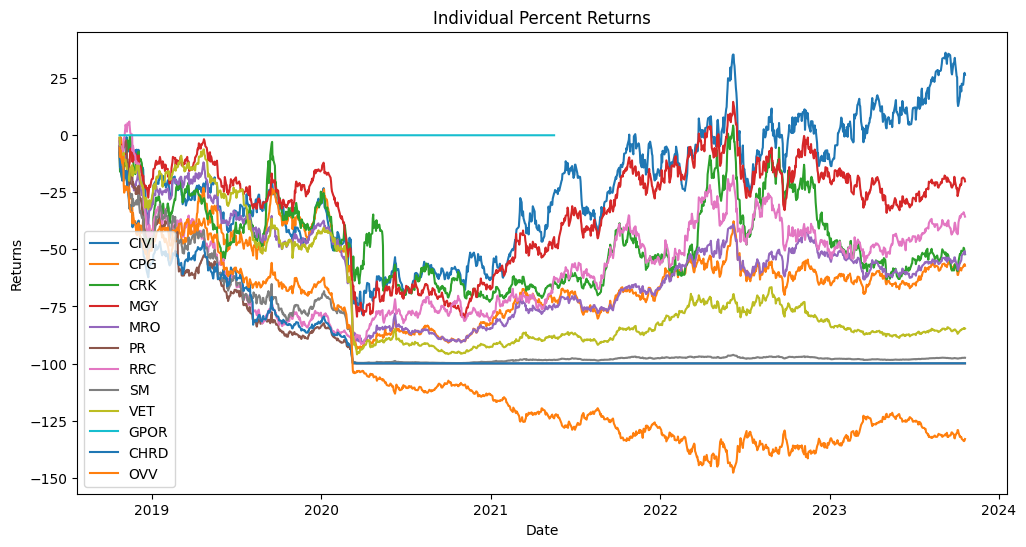

In [14]:
cumul_return2 = df.drop(columns=['date']).apply(lambda x: (1 + x).cumprod() - 1) * 100
cumul_return2.insert(0, 'date', df['date'])

fig = plt.figure(figsize=(12, 6))
for column in cumul_return2.columns:
    if column != 'date':
        plt.plot(cumul_return2['date'], cumul_return2[column], label=column.upper())

plt.ylabel('Returns')
plt.xlabel('Date')
plt.title('Individual Percent Returns')
plt.legend()
plt.show()

In [21]:
cumul_return2 = df.drop(columns=['date']).apply(lambda x: (1 + x).cumprod() - 1) * 100
cumul_return2.insert(0, 'date', df['date'])

fig = px.line(cumul_return2, x='date', y=cumul_return2.columns[1:], title='Individual Percent Returns')

# Loop through columns (excluding 'date') to set line colors and labels
for column in cumul_return2.columns:
    if column != 'date':
        fig.add_scatter(x=cumul_return2['date'], y=cumul_return2[column], mode='lines', name=column.upper())

# Customize the layout and size
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Returns',
    showlegend=True,
    width=1000,  # Set the width of the chart
    height=600,  # Set the height of the chart
)

fig.show()

/home/rthomas/anaconda3/envs/obb/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/rthomas/anaconda3/envs/obb/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [28]:
fig = px.line(cumul_return2, x='date', y=cumul_return2.columns[1:], title='Individual Percent Returns', color="size")

# Customize the layout and size
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Returns',
    showlegend=True,
    width=1000,  # Set the width of the chart
    height=600,  # Set the height of the chart
)

fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['date', 'civi', 'cpg', 'crk', 'mgy', 'mro', 'pr', 'rrc', 'sm', 'vet', 'gpor', 'chrd', 'ovv'] but received: size